In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [6]:
data = pd.read_excel("C:\\data1\\buys_computer.xlsx")

In [7]:
print(data)

       Age  Income Student Credit_Rating Buys_Computer
0     <=30    high      no          fair            no
1     <=30    high      no     excellent            no
2   31..40    high      no          fair           yes
3      >40  medium      no          fair           yes
4      >40     low     yes          fair           yes
5      >40     low     yes     excellent            no
6   31..40     low     yes     excellent           yes
7     <=30  medium      no          fair            no
8     <=30     low     yes          fair           yes
9      >40  medium     yes          fair           yes
10    <=30  medium     yes     excellent           yes
11  31..40  medium      no     excellent           yes
12  31..40    high     yes          fair           yes
13     >40  medium      no     excellent            no


In [8]:
len(data)
data.shape

(14, 5)

In [10]:
data.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


In [11]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [25]:
#Converting object datatype to int
from sklearn.preprocessing import LabelEncoder

In [28]:
def label_encoder(y):
    le = LabelEncoder()
    data[y] = le.fit_transform(data[y])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            14 non-null     object
 1   Income         14 non-null     object
 2   Student        14 non-null     object
 3   Credit_Rating  14 non-null     object
 4   Buys_Computer  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [30]:
label_list = ['Age', 'Income','Student','Credit_Rating', 'Buys_Computer']
for i in label_list:
    label_encoder(i)

In [31]:
data.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,1,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,1
3,2,2,0,1,1
4,2,1,1,1,1


In [68]:
X = data.values[:, 0:4] 
Y = data.values[:, 4]

In [69]:
# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(  
X, Y, test_size = 0.3, random_state = 100)


In [70]:
#perform training with giniIndex.
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3) 


In [71]:
    # Performing training 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [72]:
#perform training with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3) 
  
    # Performing training 
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [73]:
y_pred = clf_gini.predict(X_test) 
print("Predicted values:") 
print(y_pred)

Predicted values:
[1 1 1 0 1]


In [74]:
print("Confusion Matrix: ", 
confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", 
accuracy_score(y_test,y_pred)*100) 
      
print("Report : ", 
classification_report(y_test, y_pred))

Confusion Matrix:  [[1 1]
 [0 3]]
Accuracy :  80.0
Report :                precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



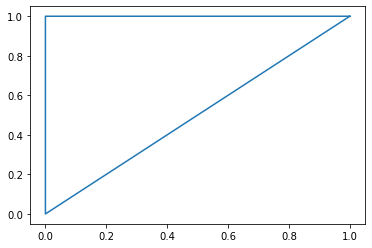

In [75]:
import matplotlib.pyplot as plt
plt.plot(y_test,y_pred)

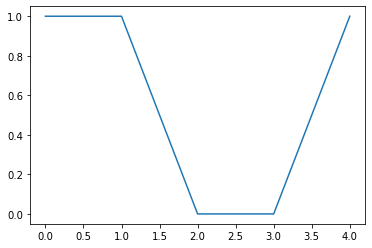

In [76]:
plt.plot(y_test)

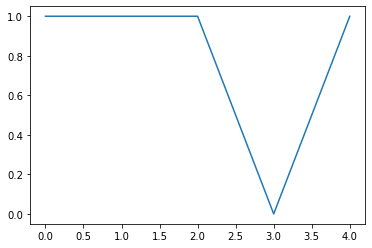

In [77]:
plt.plot(y_pred)